In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


## Loading the data

#### Load the necessary libraries

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

#### Load the dataset

In [3]:
df = pd.read_csv('/kaggle/input/titanic/train.csv');

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.shape

(891, 12)

#### analyse the dataframe

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### split the columns into 
1. numerical columns
2. categorical columns
3. mixed columns

**numerical columns** 
1. Age 
2. Fare 
3. Passenger ID

**categorical columns**
1. survived 
2. Pclass 
3. Sex 
4. Embarked
5. Sibsp 
6. Parch 

**mixed columns**
1. cabin
2. name
3. ticket

In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Univariate Analysis (numerical columns)

### Age

Conclusions:
1. There are 177 missing values (~20%)
2. The distribution is almost normal
3. It is positively skewed (0.389)
4. There are some outliers (determined by boxplot)
5. The outliers values are between 65-80 which is well in the range of normal human being age

In [8]:
df['Age'].isnull().sum()

177

In [9]:
(df['Age'].isnull().sum() / len(df['Age'])) * 100

19.865319865319865

In [10]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

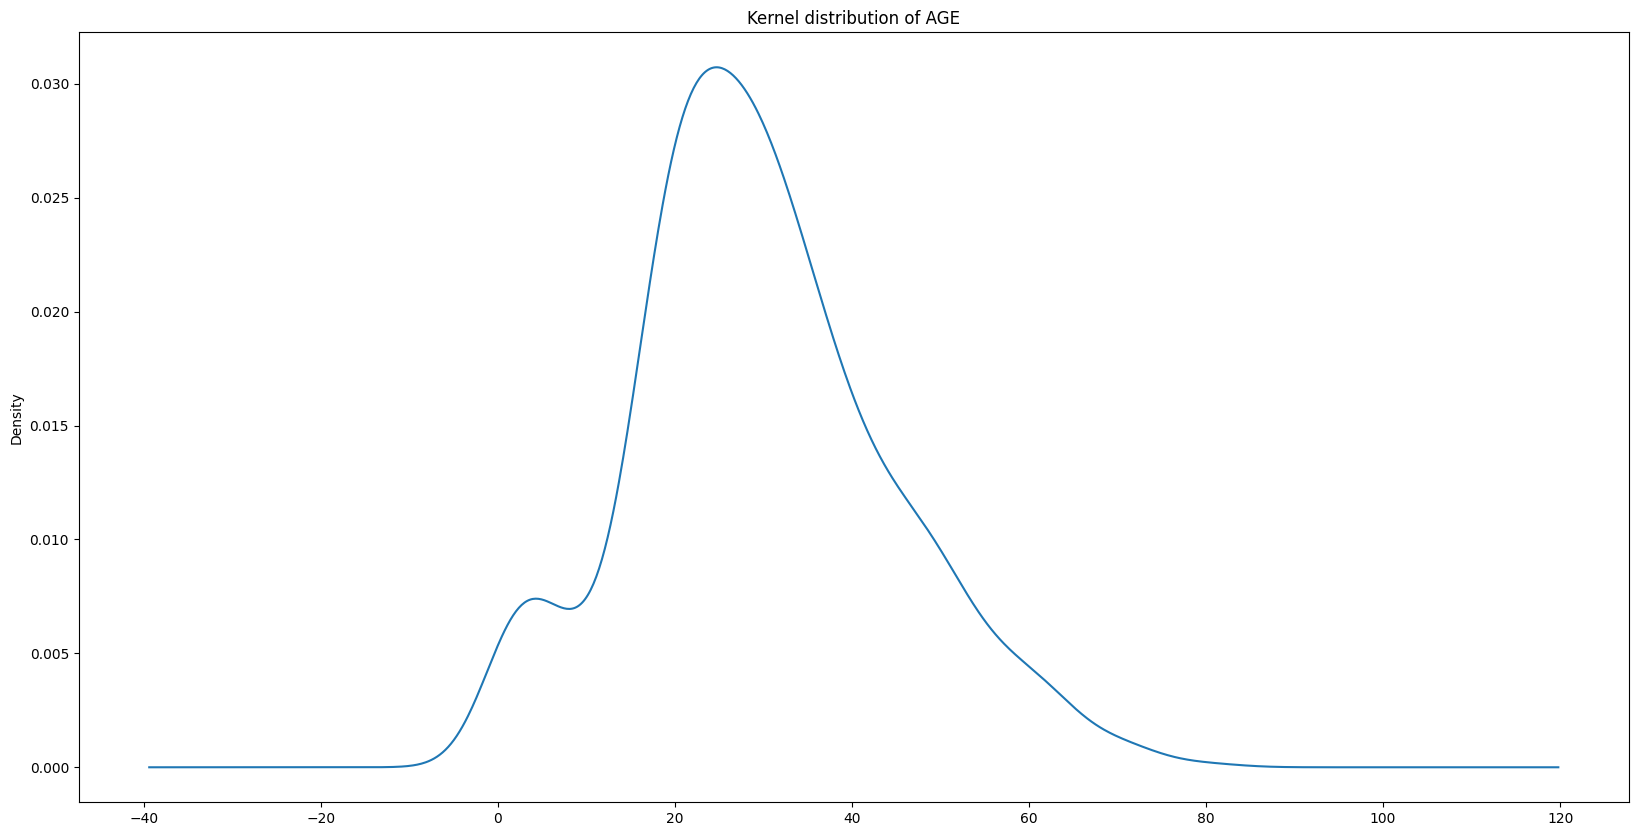

In [11]:
plt.figure(figsize = (20,10))
plt.title('Kernel distribution of AGE')
df['Age'].plot(kind='kde')
plt.show()

<Axes: ylabel='Frequency'>

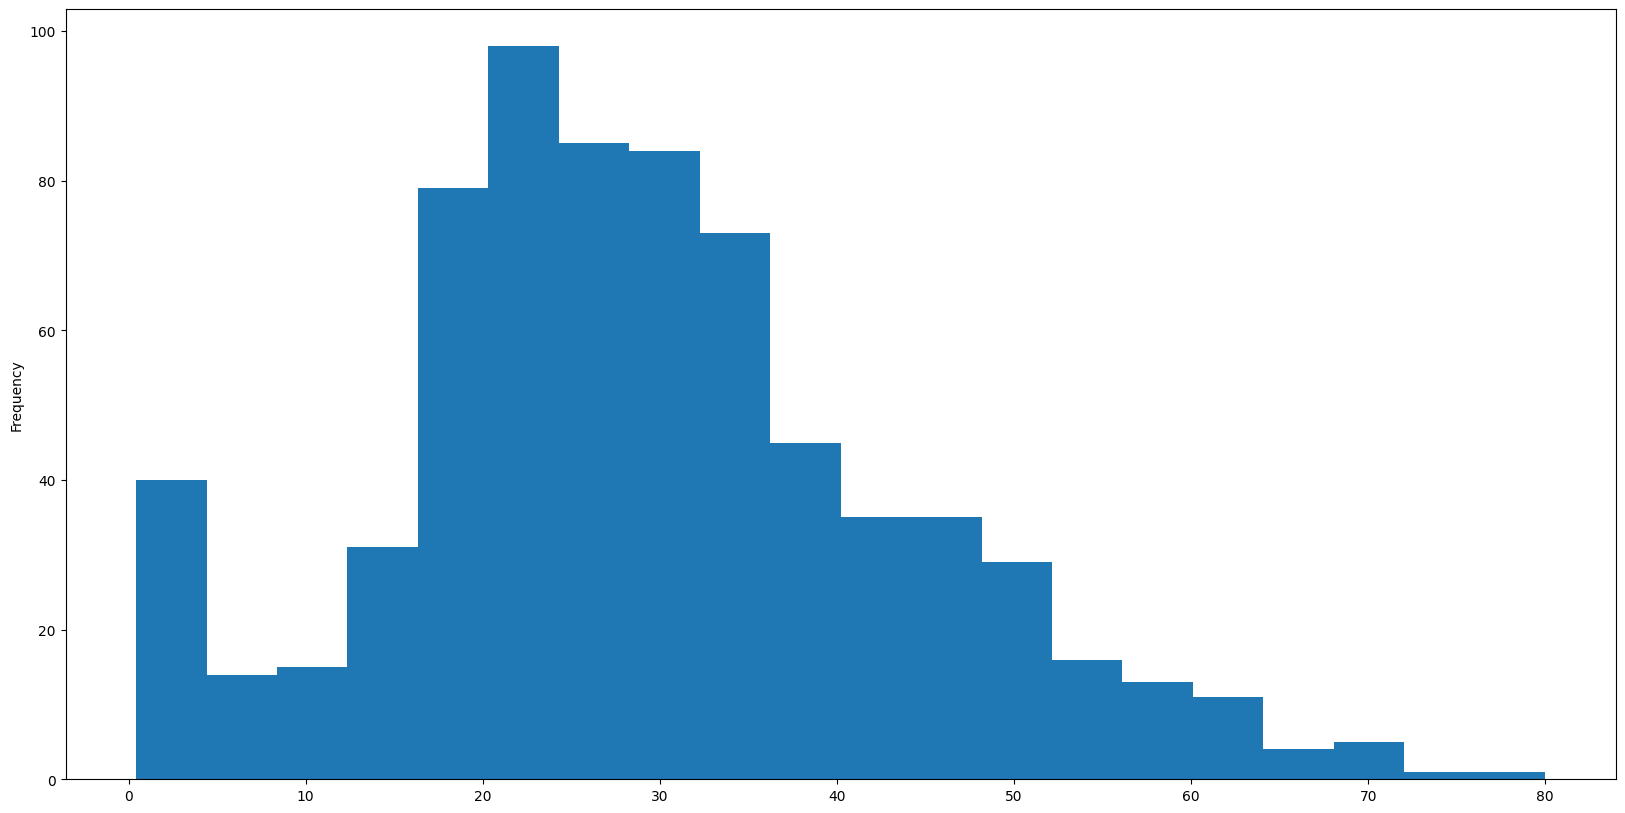

In [12]:
plt.figure(figsize = (20,10))
df['Age'].plot(kind='hist',bins=20)

In [13]:
df['Age'].skew()

0.38910778230082704

<Axes: >

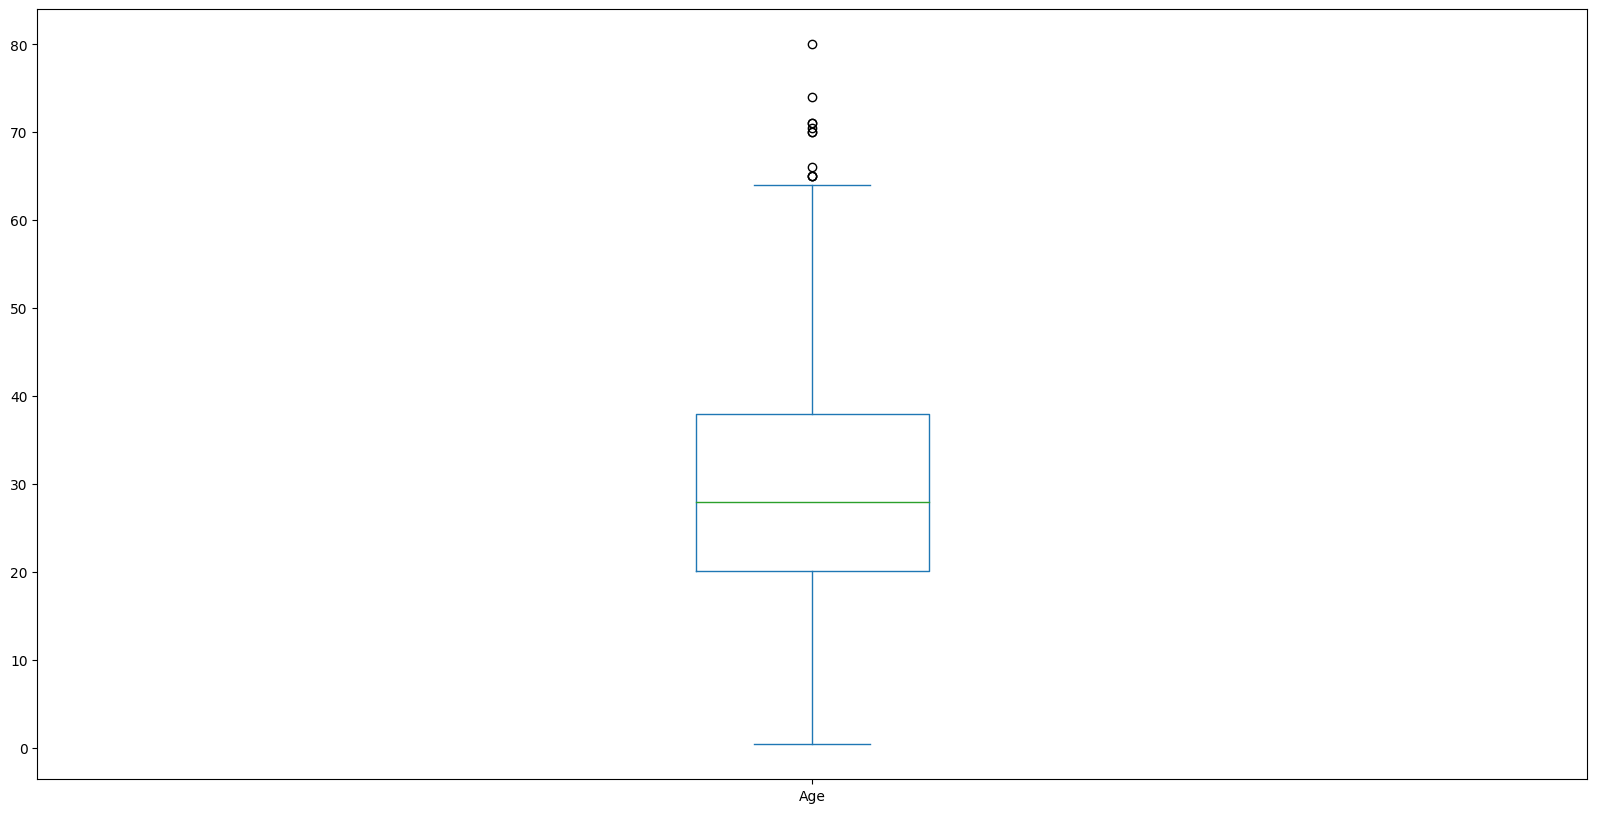

In [14]:
plt.figure(figsize = (20,10))
df['Age'].plot(kind='box')

In [15]:
## analysing outliers of the boxplot
df[df['Age'] > 65]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S


### Fare

Conclusions:
1. No mising values (which is good for our analysis)
2. Very highly positively skewed
3. 53 entries have fares greater than 100
4. 20 entries have fares greater than 200
5. 9 entries have fares greater than 250 (possible outliers)

In [16]:
df['Fare'].isnull().sum()

0

In [17]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

<Axes: >

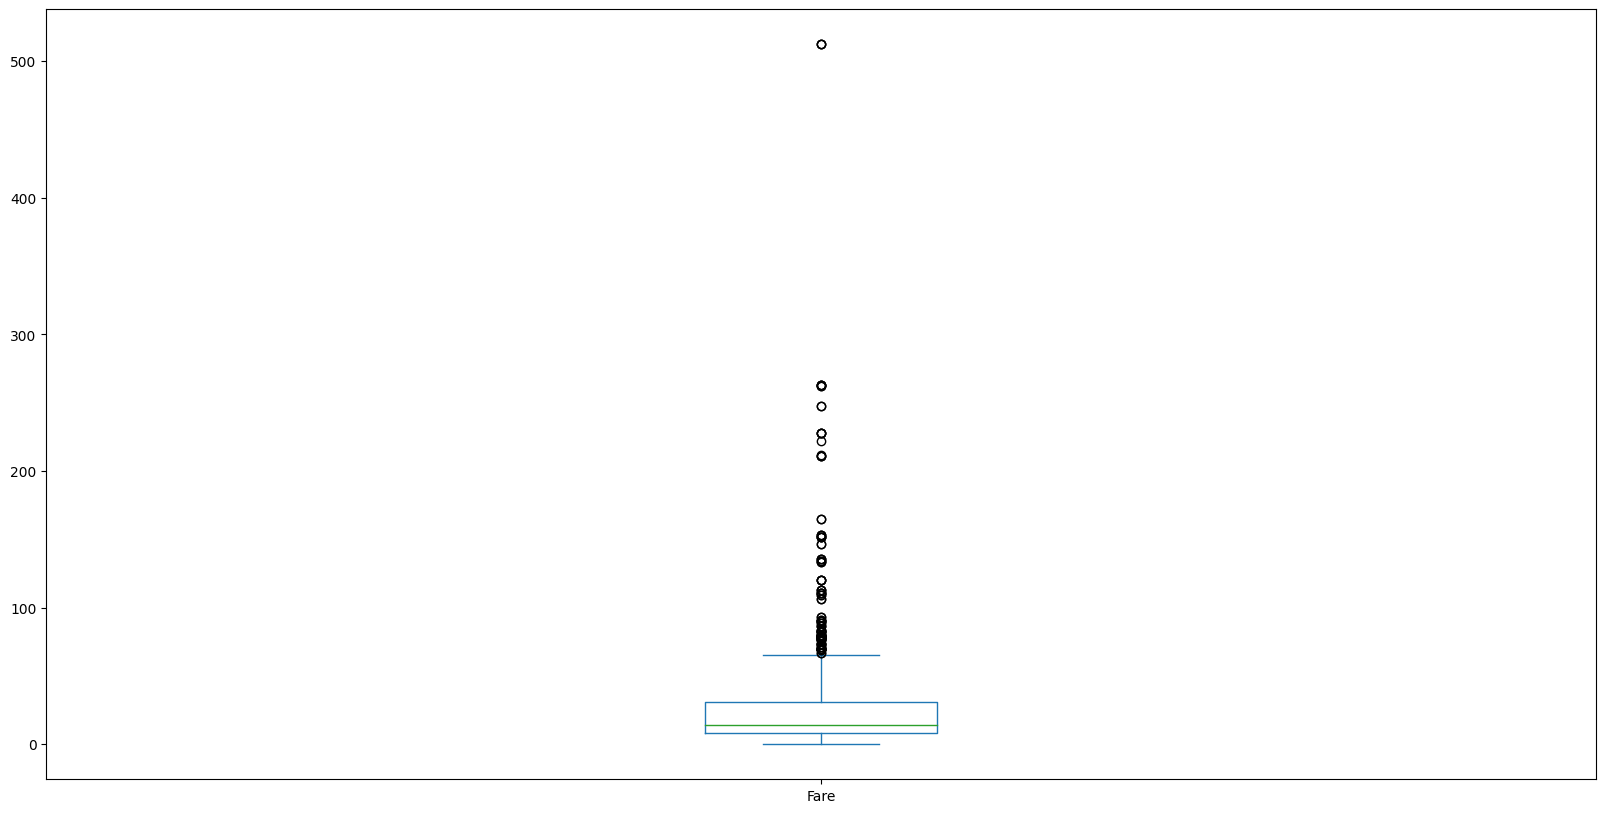

In [18]:
plt.figure(figsize = (20,10))
df['Fare'].plot(kind='box')

<Axes: ylabel='Density'>

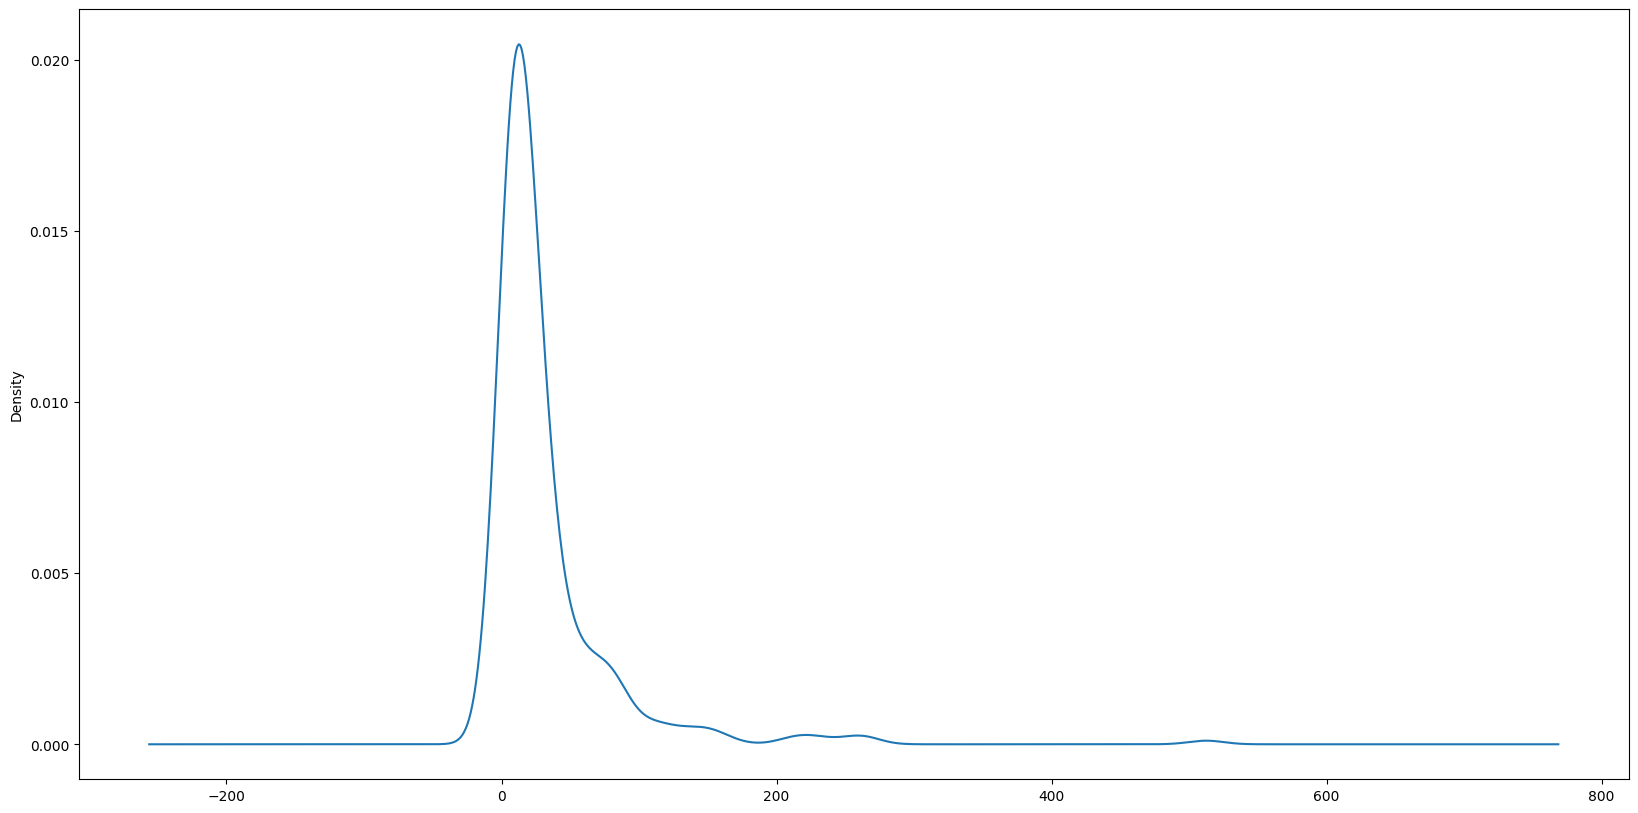

In [19]:
plt.figure(figsize = (20,10))
df['Fare'].plot(kind='kde')

In [20]:
df['Fare'].skew()

4.787316519674893

In [21]:
df[df['Fare'] > 250]
### if you observe there are fares with same amount and same ticket which indicates they were from the same family
### possible feature engineering
# 1. individual fare for each entry which is dependent of SibSp and Parch
# 2. Family is identified by the first name in the NAME column (eg. Fortune)
# 3. Family size column based on SibSp and Parch

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
742,743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C


#### Feature engineering for Fare column

In [22]:
df['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [23]:
df[df['SibSp'] ==  8]
# here it shows there are are total of 8 + 2 + 1 = family of 11 but only 7 entries
# data could be missing? 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [24]:
df['Individual_Fare'] = df['Fare'] / (df['SibSp'] + df['Parch'] + 1)

In [25]:
df['Family_Size'] = (df['SibSp'] + df['Parch'] + 1)

In [26]:
df['Family_Name'] = df['Name'].apply(lambda x : x.split(',')[0])

In [27]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Individual_Fare,Family_Size,Family_Name
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3.62500,2,Braund
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,35.64165,2,Cumings
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,7.92500,1,Heikkinen
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,26.55000,2,Futrelle
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,8.05000,1,Allen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,13.00000,1,Montvila
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,30.00000,1,Graham
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,5.86250,4,Johnston
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,30.00000,1,Behr


## Univariate analysis (categorical columns)

### Survived

Conclusions:
1. No missing Values
2. Only 38.4% people survived

In [28]:
df['Survived'].isnull().sum()

0

In [29]:
df['Survived'].value_counts()
# 1 -> Survived
# 0 -> Not Survived

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

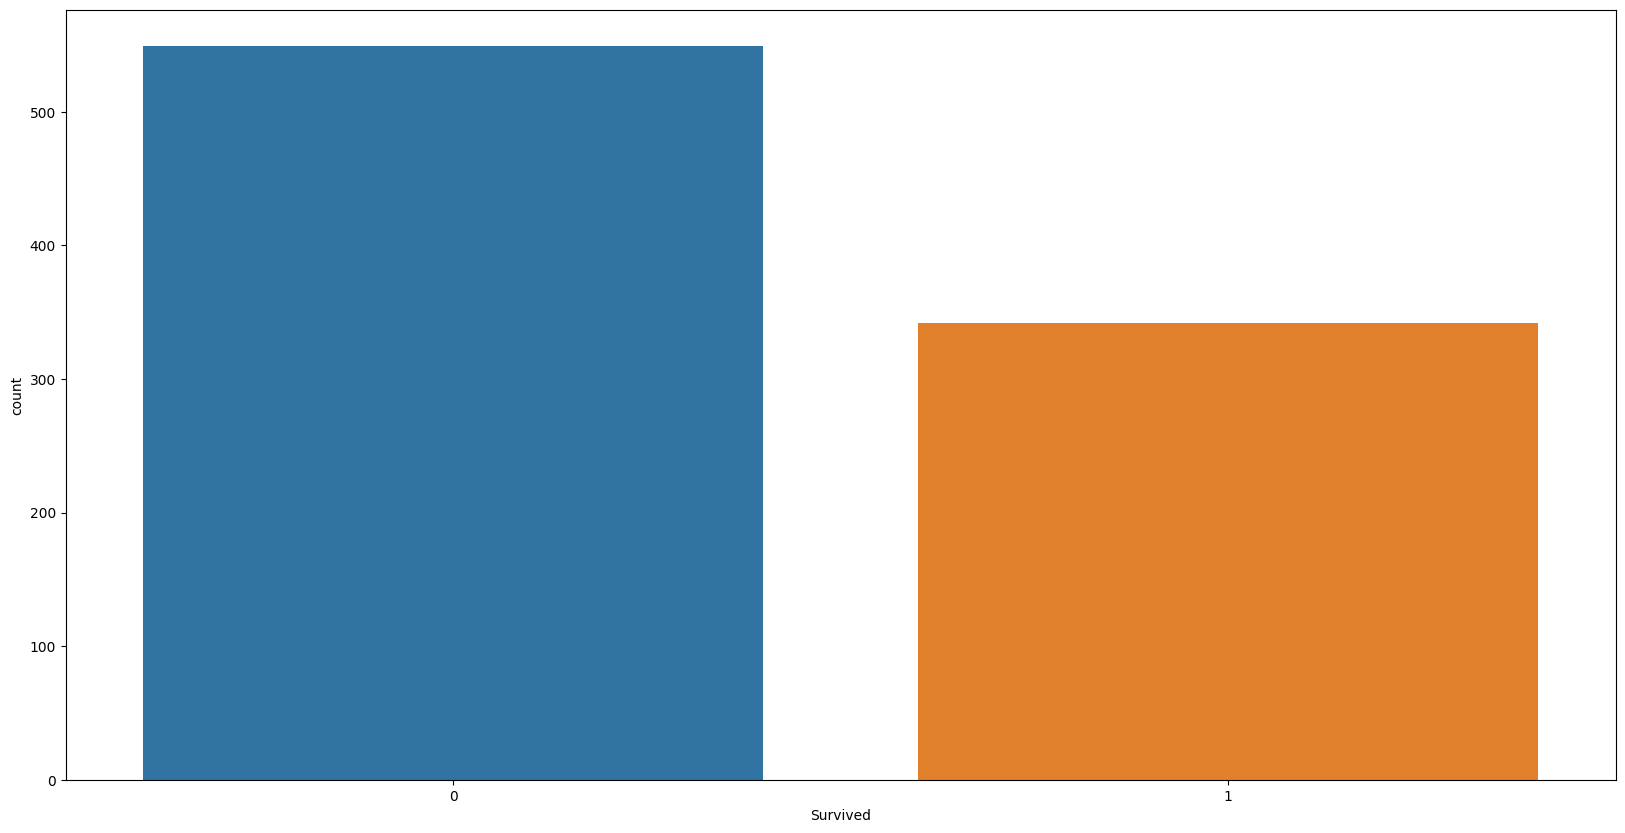

In [30]:
plt.figure(figsize = (20,10))
sns.countplot(data=df, x="Survived")

<Axes: ylabel='count'>

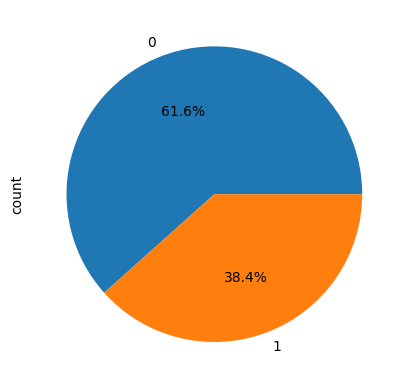

In [31]:
df['Survived'].value_counts().plot(kind = 'pie', autopct='%0.1f%%')

###  Pclass

Conclusions:
1. generally 3rd class people should be more followed by 2nd and then 1st. But thats not the case here, Its 3rd > 1st > 2nd. Some data missing?
2. No missing values

In [32]:
df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [33]:
df['Pclass'].isnull().sum()

0

<Axes: xlabel='Pclass', ylabel='count'>

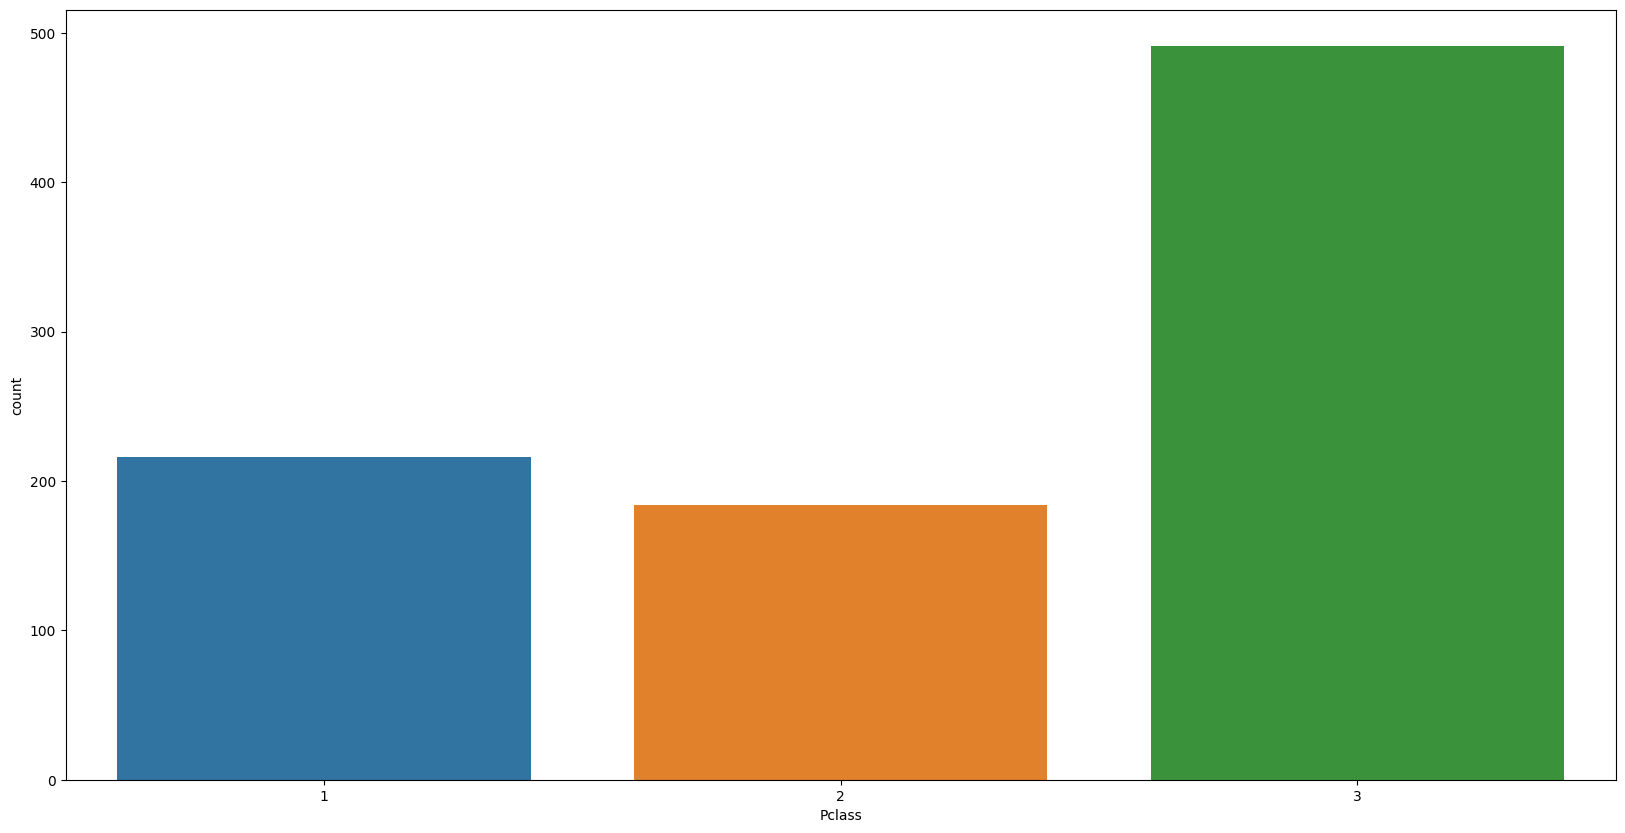

In [34]:
plt.figure(figsize = (20,10))
sns.countplot(data=df, x="Pclass")

<Axes: ylabel='count'>

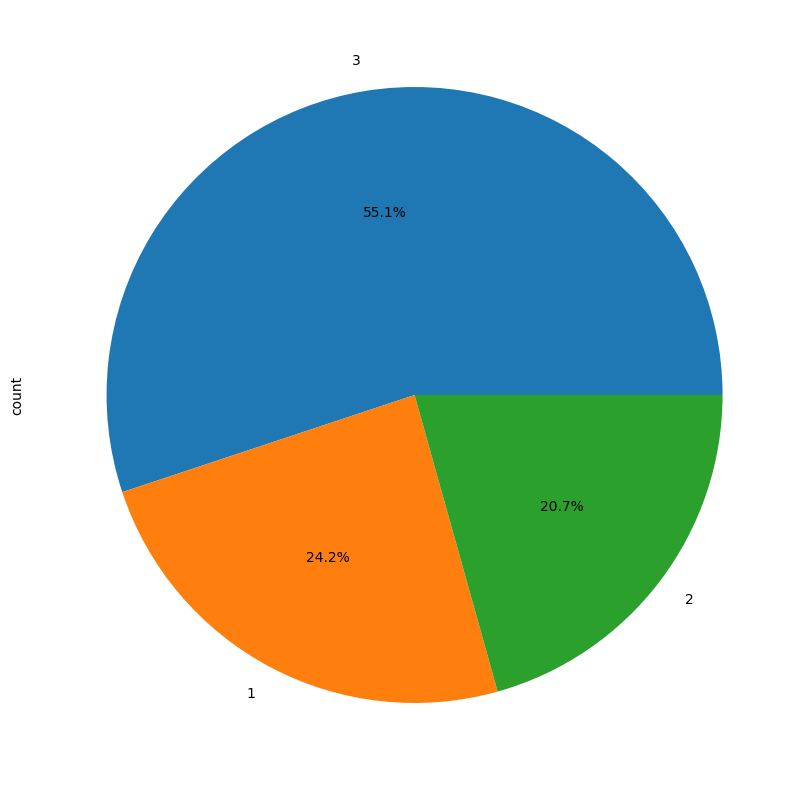

In [35]:
plt.figure(figsize = (20,10))
df['Pclass'].value_counts().plot(kind = 'pie', autopct="%0.1f%%")

### gender
conclusions:
1. No missing values
2. Large number of males compared to females

In [36]:
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [37]:
df['Sex'].isnull().sum()

0

<Axes: xlabel='Sex', ylabel='count'>

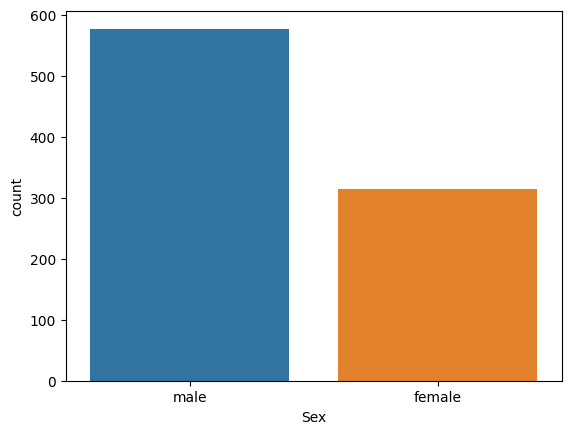

In [38]:
sns.countplot(data=df, x="Sex")

<Axes: ylabel='count'>

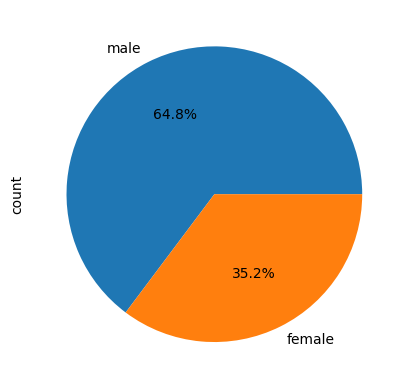

In [39]:
df['Sex'].value_counts().plot(kind='pie', autopct='%0.1f%%')

### Embarked

Conclusions:
1. There are 2 missing values
2. A lot of people boarded the ship in Southampton
3. Entry 61 and 829, boarding status was missing (both belonged to 1st class and have survived and have the same ticket but not the same family)

In [40]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [41]:
df['Embarked'].isnull().sum()

2

In [42]:
LST = list(df['Embarked'])
LST
missing = []
for i,boarded in enumerate(LST):
    if(boarded != 'S' and boarded != 'C' and boarded != 'Q'):
        missing.append(i)


In [43]:
missing

[61, 829]

In [44]:
df.iloc[missing]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Individual_Fare,Family_Size,Family_Name
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,80.0,1,Icard
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,80.0,1,Stone


### SibSp

Conclusions
1. No missing values
2. A lot of people are travelling alone (SibSp = 0)

In [45]:
df['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [46]:
df['SibSp'].isnull().sum()

0

<Axes: xlabel='SibSp', ylabel='count'>

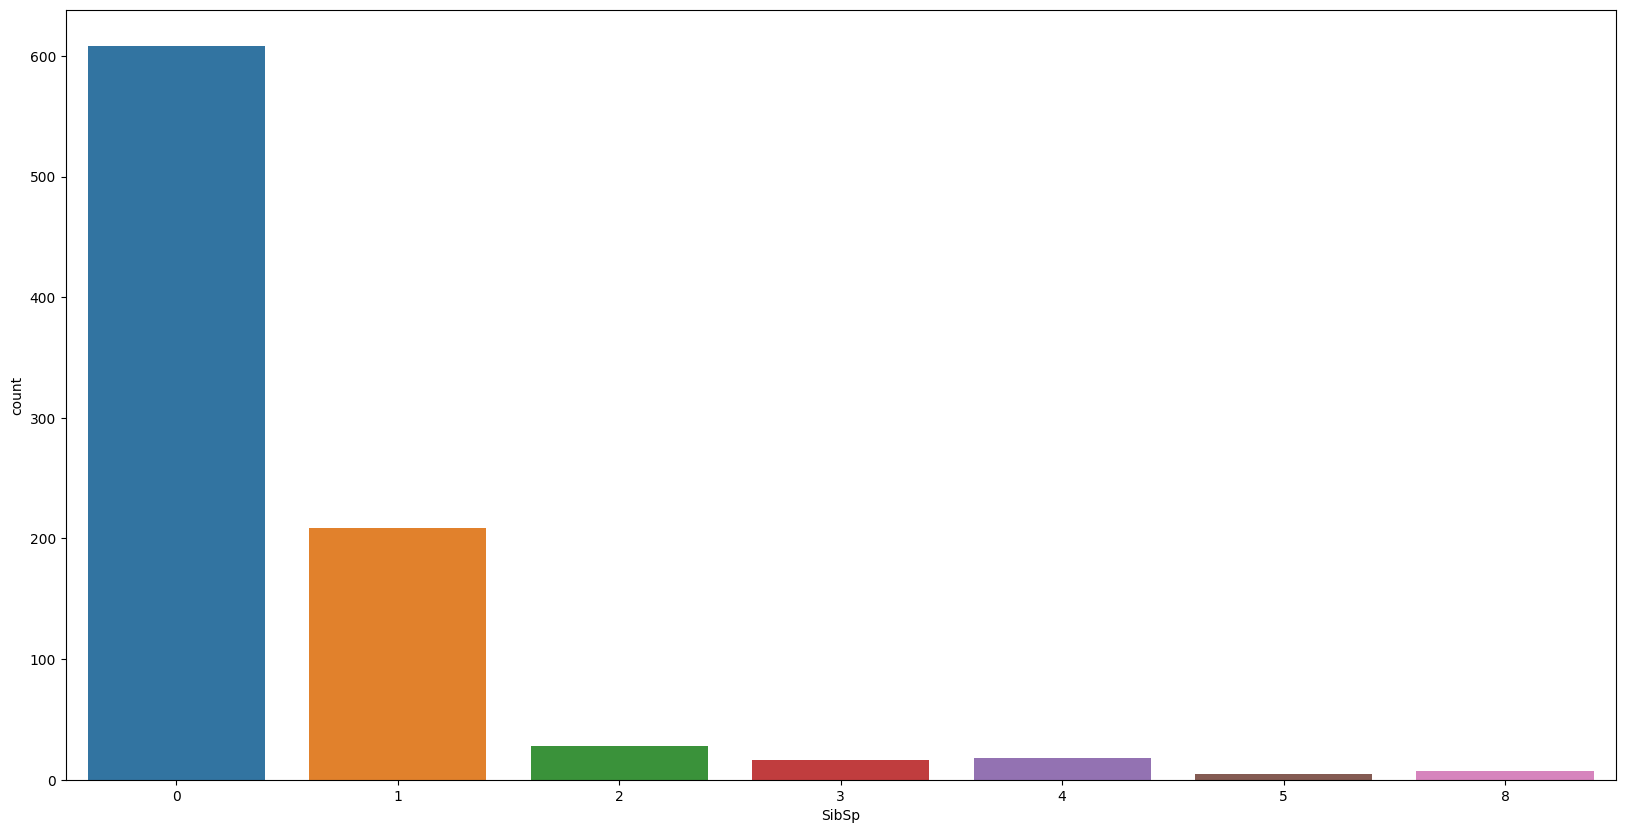

In [47]:
plt.figure(figsize= (20,10))
sns.countplot(data=df, x="SibSp")

### Parch

Conclusions:
1. q

In [48]:
df['Parch'].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

In [49]:
df['Parch'].isnull().sum()

0

<Axes: xlabel='Parch', ylabel='count'>

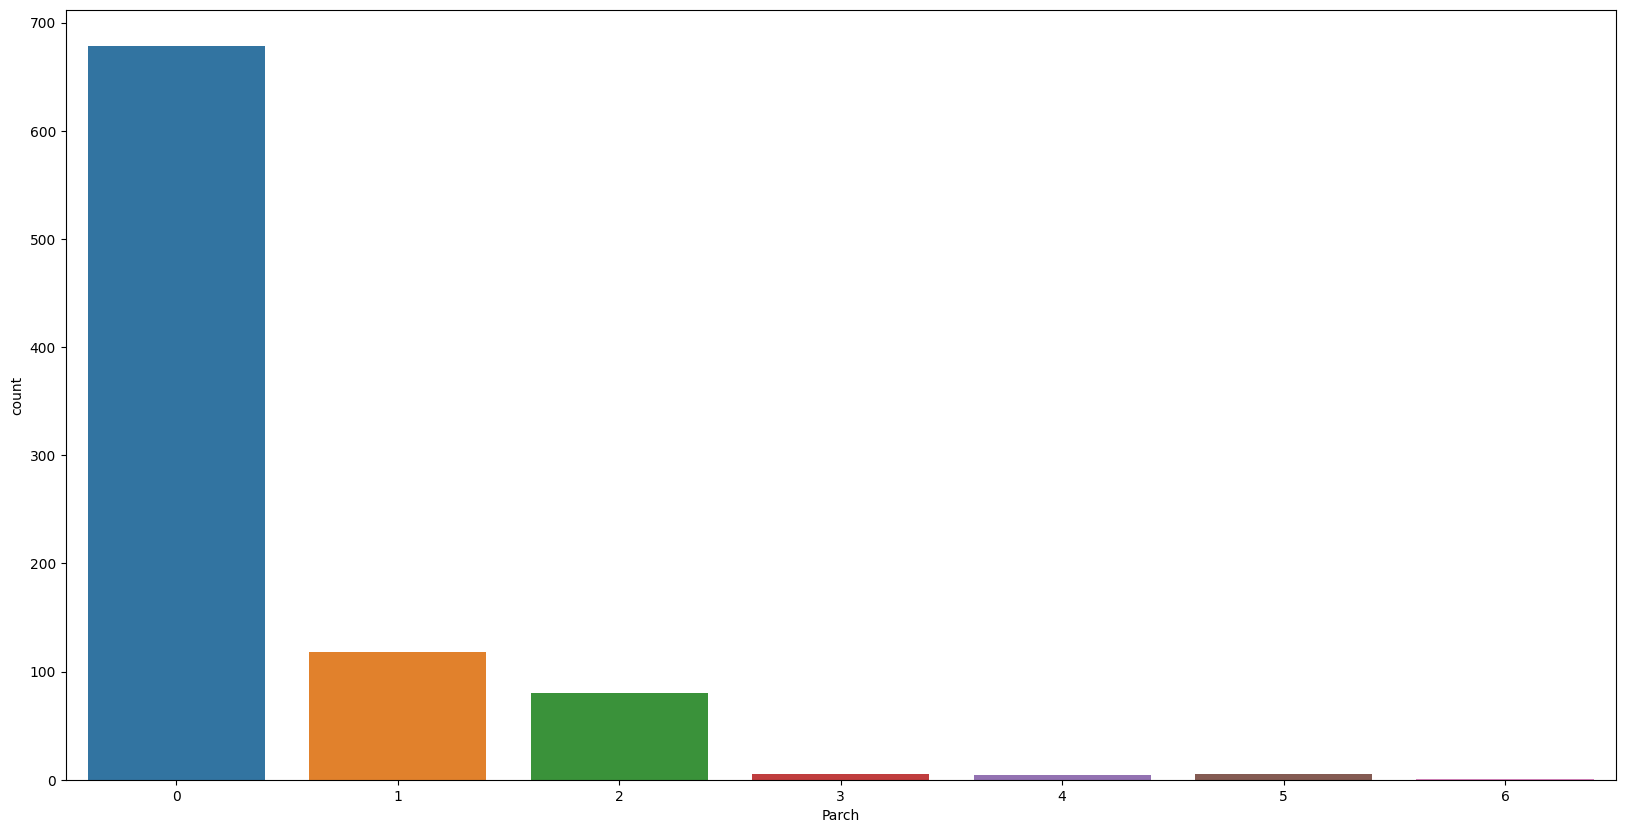

In [50]:
plt.figure(figsize=(20,10))
sns.countplot(data=df, x="Parch")

## Summary of Univariate analysis

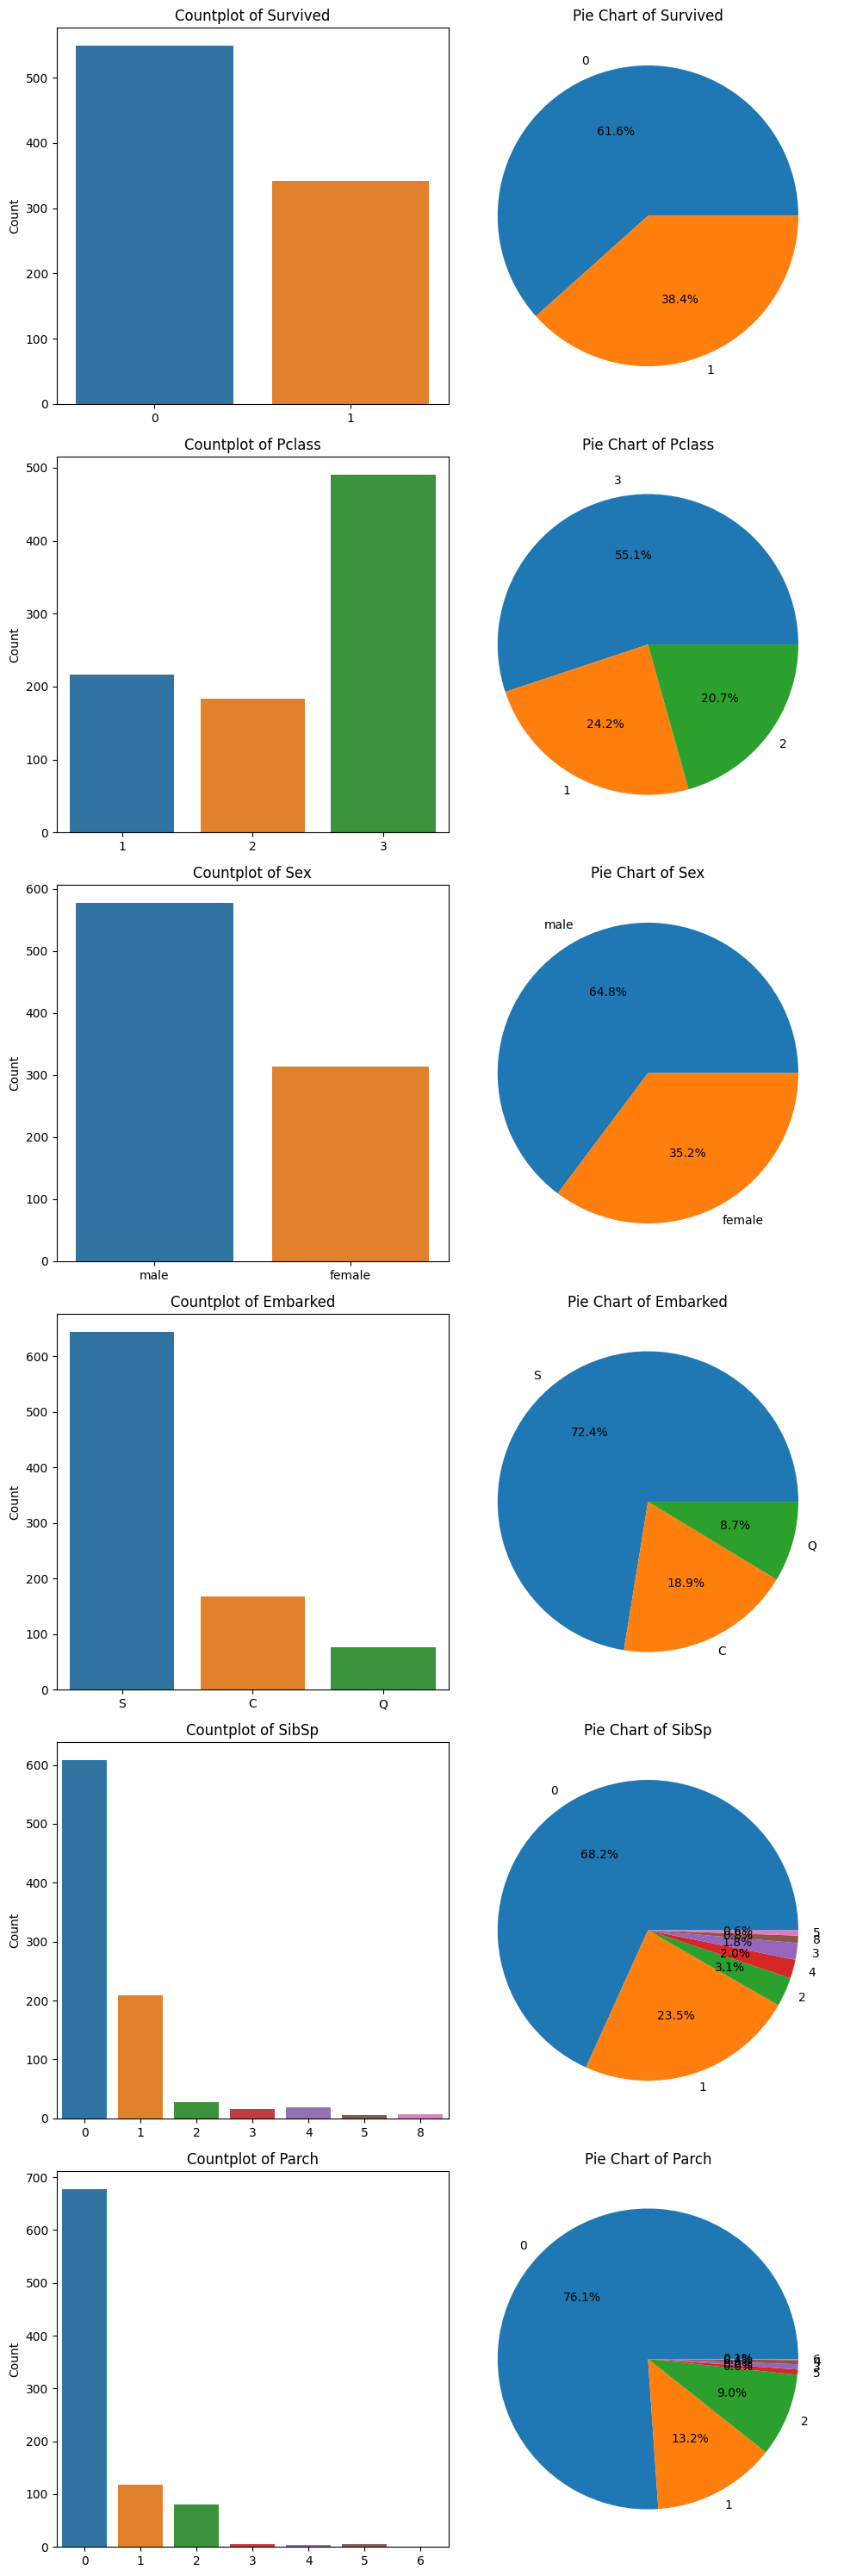

In [51]:
features = ['Survived' , 'Pclass' , 'Sex' , 'Embarked' , 'SibSp' , 'Parch']
rows = len(features) 
fig, axes = plt.subplots(rows, 2, figsize=(10, 5 * rows))

for i, feature in enumerate(features):
    
    sns.countplot(x=feature, data=df, ax=axes[i, 0])
    axes[i, 0].set_title(f"Countplot of {feature}")
    axes[i, 0].set_xlabel("")
    axes[i, 0].set_ylabel("Count")
    
    # Pie chart
    value_counts = df[feature].value_counts()
    axes[i, 1].pie(value_counts, labels=value_counts.index, autopct="%0.1f%%")
    axes[i, 1].set_title(f"Pie Chart of {feature}")

# Adjust layout
plt.tight_layout()
plt.show()

## Bivariate Analysis

### Steps of doing Bivariate Analysis

- Select 2 cols
- Understand type of relationship
    1. **Numerical - Numerical**<br>
        a. You can plot graphs like scatterplot(regression plots), 2D histplot, 2D KDEplots<br>
        b. Check correlation coefficent to check linear relationship
    2. **Numerical - Categorical** - create visualizations that compare the distribution of the numerical data across different categories of the categorical data.<br>
        a. You can plot graphs like barplot, boxplot, kdeplot violinplot even scatterplots<br>
    3. **Categorical - Categorical**<br>
        a. You can create cross-tabulations or contingency tables that show the distribution of values in one categorical column, grouped by the values in the other categorical column.<br>
        b. You can plots like heatmap, stacked barplots, treemaps
        
- Write your conclusions

### Survived VS Pclass

Determine the trends in Survived vs Pclass:
1. about 62% of the people from Pclass 1 survived (rich people)
2. about 75% of the people from Pclass 3 did not survive
3. Pclass 2 is almost balanced

In [52]:
pd.crosstab(df['Survived'], df['Pclass'], normalize='columns')*100

Pclass,1,2,3
Survived,,,
0,37.037037,52.717391,75.763747
1,62.962963,47.282609,24.236253


<Axes: xlabel='Pclass', ylabel='Survived'>

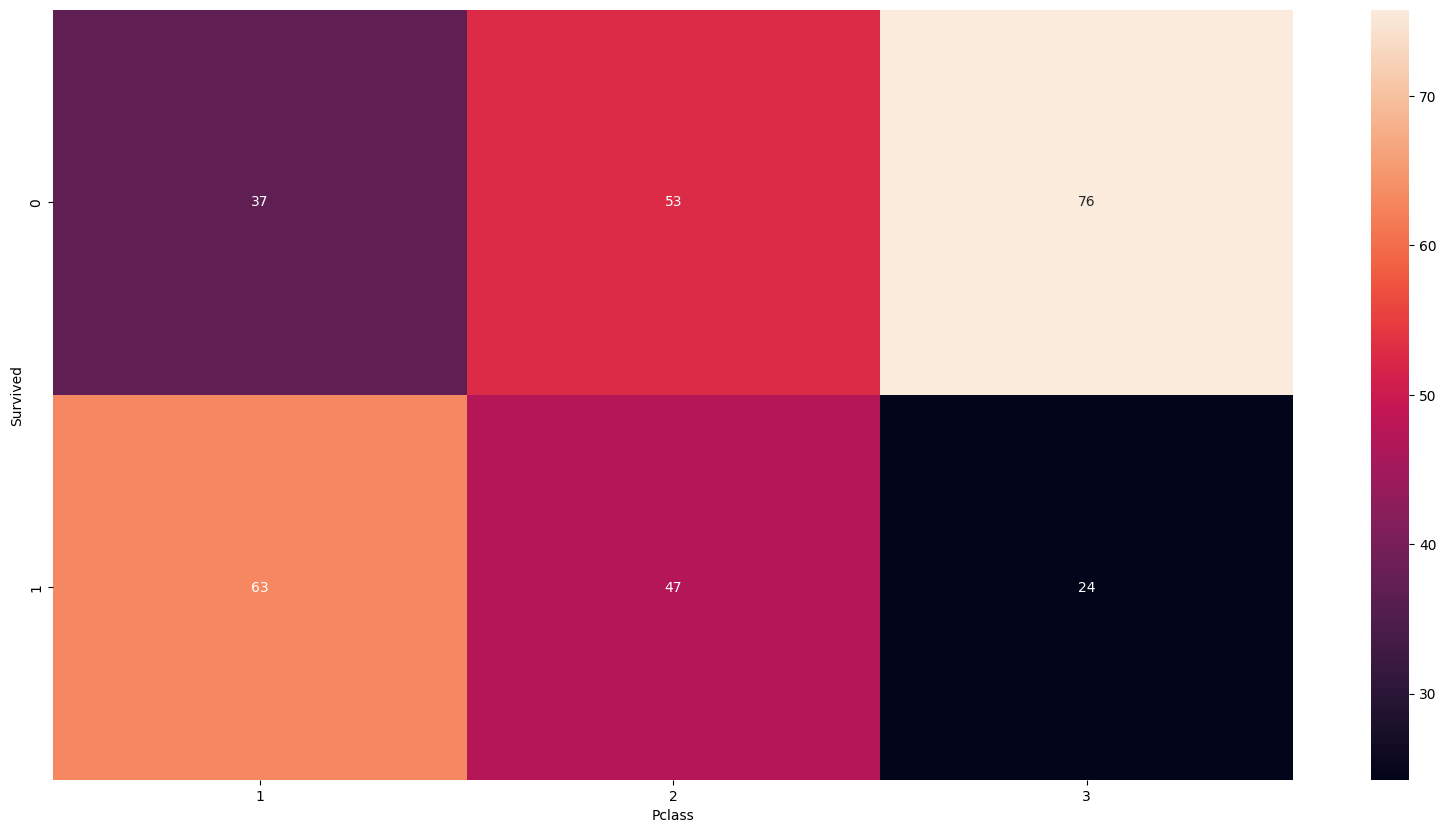

In [53]:
plt.figure(figsize = (20,10))
sns.heatmap(pd.crosstab(df['Survived'], df['Pclass'], normalize='columns')*100, annot=True)

### Survived vs Embarked

Observe the trends in Survived vs Embarked:
1. 55% (most) of the people survived who boarded from Cherbourg (C)
2. 66% (least) of the people did not survived who boarded from Southampton (S)
3. Is there a releation between people boarding from Cherbourg and Pclass 1

In [54]:
pd.crosstab(df['Survived'] , df['Embarked'], normalize='columns')*100

Embarked,C,Q,S
Survived,,,
0,44.642857,61.038961,66.304348
1,55.357143,38.961039,33.695652


### Embarked vs Pclass

Observe the trends in Embarked vs Pclass:
1. Our assumption is true i.e A large number of people who boarded from Cherbourg are in Pclass 1 which indicates that Cherbough could be a very wealthy place
2. A large number of people (93%) who boarded in southampton are in Pclass 3 which could indicate it had normal middle class passengers

In [55]:
pd.crosstab(df['Pclass'], df['Embarked'], normalize='columns')*100

Embarked,C,Q,S
Pclass,,,
1,50.595238,2.597403,19.720497
2,10.119048,3.896104,25.465839
3,39.285714,93.506494,54.813665


### Survived vs Gender

Conclusions:
1. A lot of females were rescued (given more priority compared to males)

In [56]:
pd.crosstab(df['Survived'] , df['Sex'])

Sex,female,male
Survived,,
0,81,468
1,233,109


### Survived vs Age
Conclusions:
1. In the range (0-5), blue curve(Survived) dominates the orange curve (not survived) which indicates that a lot infants were rescued
2. In the range (15-35), orange curve dominates blue curve which indicates that they were not rescued
3. In the range (35-60), it is oscillating
4. In the range (60-80), again orange curve dominates which indicates the older citizens were not been able to be rescued

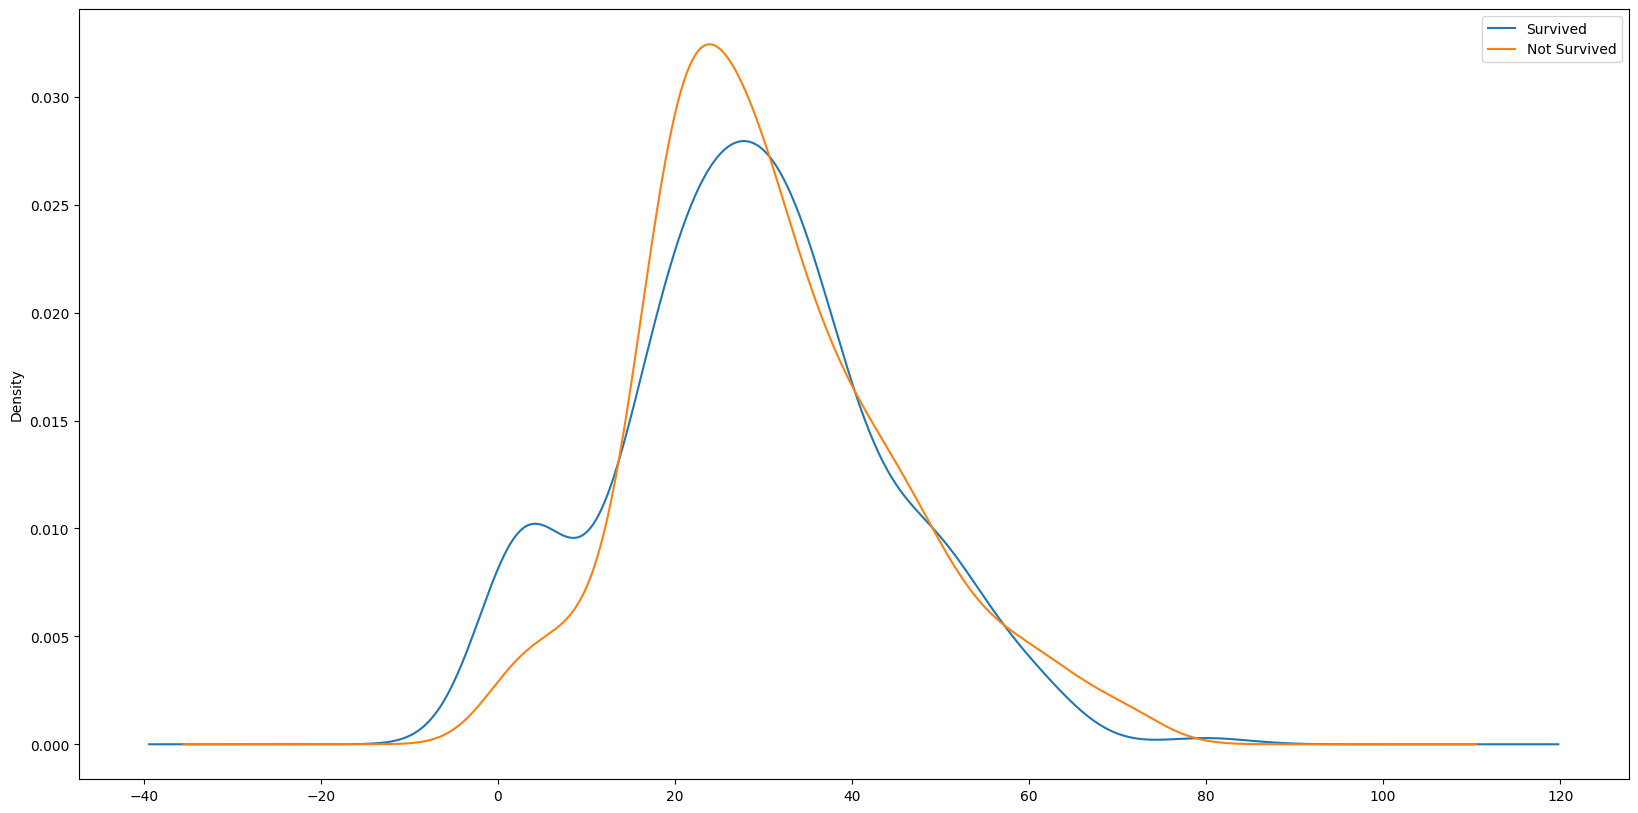

In [57]:
plt.figure(figsize= (20,10))
df[df['Survived'] == 1]['Age'].plot(kind = 'kde', label='Survived')
df[df['Survived'] == 0]['Age'].plot(kind = 'kde', label='Not Survived')

plt.legend()
plt.show()

### Survived vs Family Size

Conclusions:
1. Family with large number of people were not able to survive
2. Similarly passenger travelling alone too were not able to survive (69%)

In [58]:
df['Family_Size'].value_counts()

Family_Size
1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: count, dtype: int64

In [59]:
pd.crosstab(df['Survived'], df['Family_Size'], normalize='columns')*100

Family_Size,1,2,3,4,5,6,7,8,11
Survived,,,,,,,,,
0,69.646182,44.720497,42.156863,27.586207,80.0,86.363636,66.666667,100.0,100.0
1,30.353818,55.279503,57.843137,72.413793,20.0,13.636364,33.333333,0.0,0.0


<Axes: xlabel='Family_Size', ylabel='Survived'>

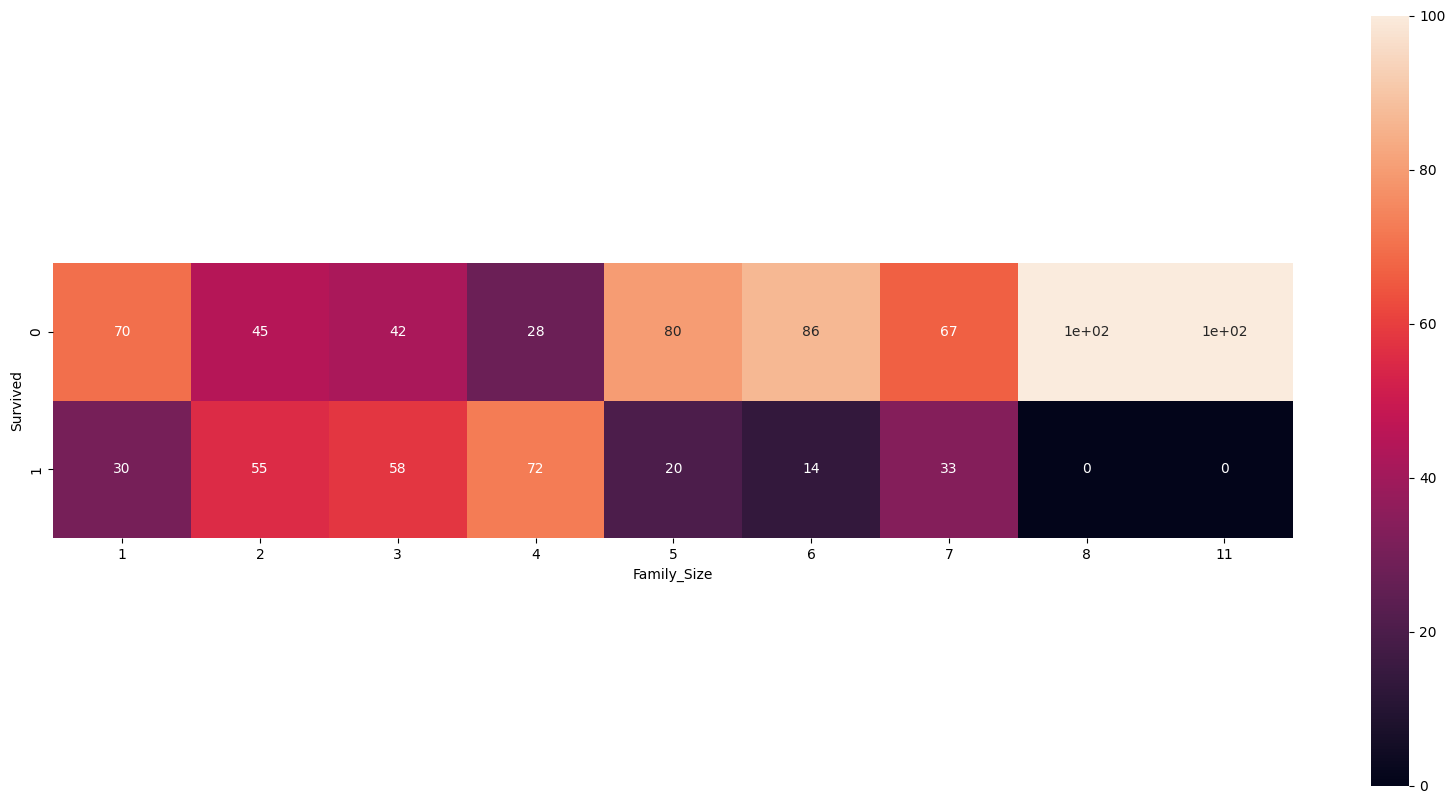

In [60]:
plt.figure(figsize = (20,10))
sns.heatmap(pd.crosstab(df['Survived'], df['Family_Size'], normalize='columns')*100, annot=True, square=True)

### Survived vs Title

In [61]:
df['title'] = df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [62]:
df['title'].isnull().sum()

0

In [63]:
df['title'].value_counts()

title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64

In [64]:
group_map = {
    "Mr": "Mr",
    "Master": "Master",
    "Sir": "Mr",
    "Don": "Mr",
    "Jonkheer": "Mr",
    "Major": "Mr",
    "Capt": "Mr",
    "Col": "Mr",
    "Miss": "Miss",
    "Mlle": "Miss",
    "Mrs": "Mrs",
    "Mme": "Mrs",
    "Lady": "Mrs",
    "the Countess": "Mrs",
    "Ms": "Mrs",
    "Dr": "Others",
    "Rev": "Others"
}
df['title'] = df["title"].map(group_map)

In [65]:
df['title'].value_counts()

title
Mr        525
Miss      184
Mrs       129
Master     40
Others     13
Name: count, dtype: int64

In [66]:
pd.crosstab(df['Survived'], df['title'],normalize = 'columns')*100

title,Master,Miss,Mr,Mrs,Others
Survived,,,,,
0,42.5,29.891304,84.0,20.155039,76.923077
1,57.5,70.108696,16.0,79.844961,23.076923


### Feature engineering for cabin to get new column deck

Conclusions:
1. There are 687 missing values (which is a lot) Let us assign 

In [67]:
df['Cabin'].value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

In [68]:
df['Cabin'].isnull().sum()

687

In [69]:
df[df['Cabin'] == 'G6']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Individual_Fare,Family_Size,Family_Name,title
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,5.566667,3,Sandstrom,Miss
205,206,0,3,"Strom, Miss. Telma Matilda",female,2.0,0,1,347054,10.4625,G6,S,5.231250,2,Strom,Miss
251,252,0,3,"Strom, Mrs. Wilhelm (Elna Matilda Persson)",female,29.0,1,1,347054,10.4625,G6,S,3.487500,3,Strom,Mrs
394,395,1,3,"Sandstrom, Mrs. Hjalmar (Agnes Charlotta Bengt...",female,24.0,0,2,PP 9549,16.7000,G6,S,5.566667,3,Sandstrom,Mrs


In [70]:

df['deck'] = df['Cabin'].apply(lambda x: x[0] if not pd.isna(x) else 'M')

In [71]:
df['deck']

0      M
1      C
2      M
3      C
4      M
      ..
886    M
887    B
888    M
889    C
890    M
Name: deck, Length: 891, dtype: object

In [72]:
df['deck'].value_counts()

deck
M    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: count, dtype: int64

### analysis on deck

1. A lot of people from B,D deck survived (any relation b/w the Pclass)
2. People from deck B belonged to the Pclass1
3. people from deck A,B,C belonged to Pclass1 but priority of survival was given to A
4. A lot of casualties occured in the M deck and belonged to Pclass3
5. G deck belonged to Pclass3 (100%) but only 50% survived

In [73]:
pd.crosstab(df['Survived'], df['deck'], normalize='columns')*100

deck,A,B,C,D,E,F,G,M,T
Survived,,,,,,,,,
0,53.333333,25.531915,40.677966,24.242424,25.0,38.461538,50.0,70.014556,100.0
1,46.666667,74.468085,59.322034,75.757576,75.0,61.538462,50.0,29.985444,0.0


<Axes: xlabel='deck', ylabel='Survived'>

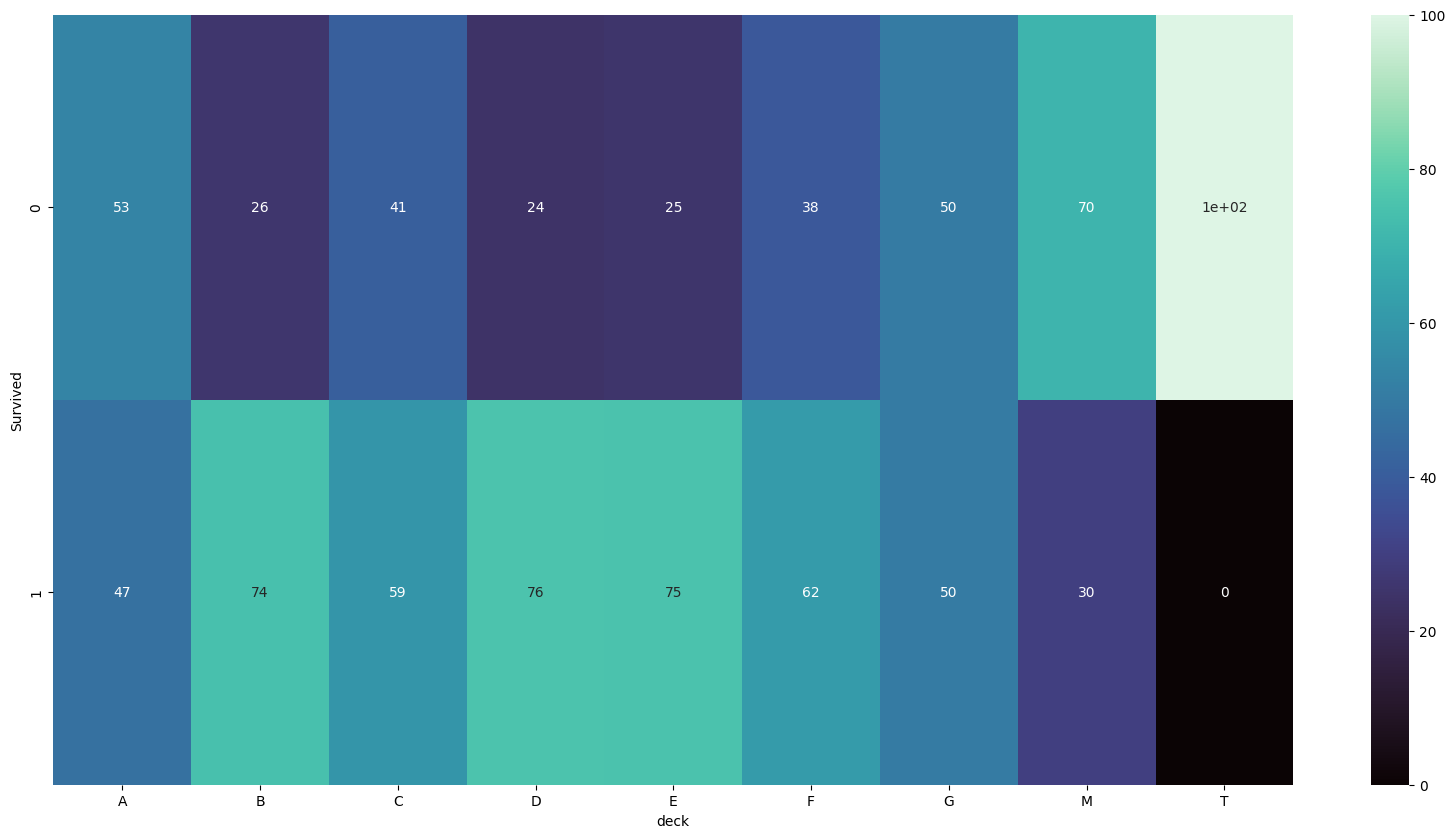

In [74]:
plt.figure(figsize = (20,10))
sns.heatmap(pd.crosstab(df['Survived'], df['deck'], normalize='columns')*100, cmap='mako', annot=True)

In [75]:
pd.crosstab(df['Pclass'], df['deck'], normalize='columns')*100

deck,A,B,C,D,E,F,G,M,T
Pclass,,,,,,,,,
1,100.0,100.0,100.0,87.878788,78.125,0.000000,0.0,5.822416,100.0
2,0.0,0.0,0.0,12.121212,12.500,61.538462,0.0,24.454148,0.0
3,0.0,0.0,0.0,0.000000,9.375,38.461538,100.0,69.723435,0.0


<Axes: xlabel='Sex', ylabel='count'>

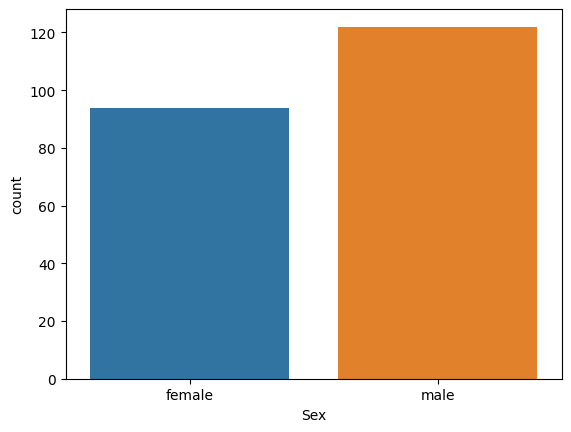

In [76]:
filt = (df['Pclass'] == 1) | (df['deck'] == 'A')
df.loc[filt]

sns.countplot(data = df.loc[filt] , x='Sex')

<Axes: ylabel='Density'>

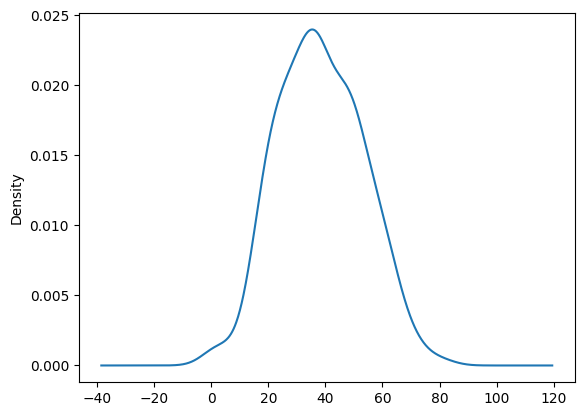

In [77]:
df.loc[filt]['Age'].plot(kind='kde')

In [78]:
df.loc[filt]['Age'].skew()

0.11985744501915112

<Axes: xlabel='Sex', ylabel='count'>

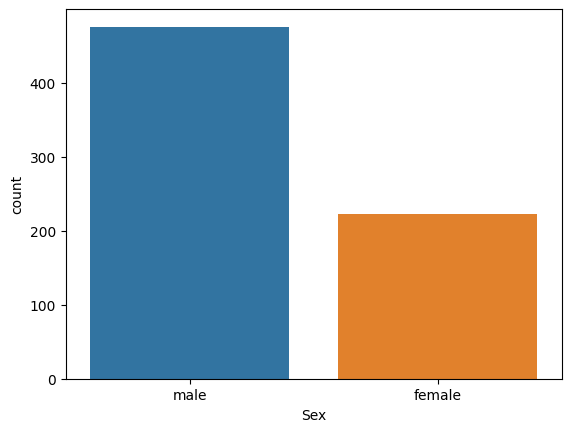

In [79]:
filt = (df['Pclass'] == 3) | (df['deck'] == 'M')
sns.countplot(data = df.loc[filt] , x='Sex')

<Axes: ylabel='Density'>

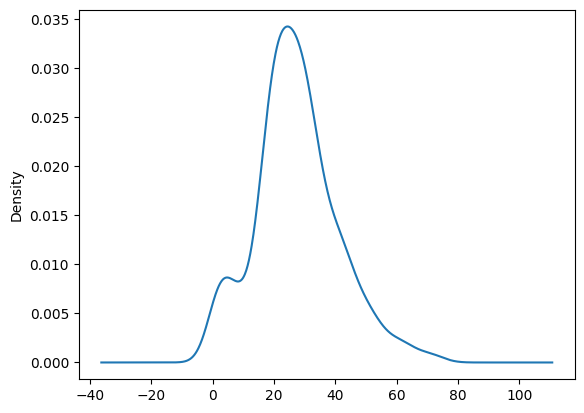

In [80]:
df.loc[filt]['Age'].plot(kind='kde')

In [81]:
df.loc[filt]['Age'].skew()

0.4485949292794226

## Mutlivariate analysis

<Axes: >

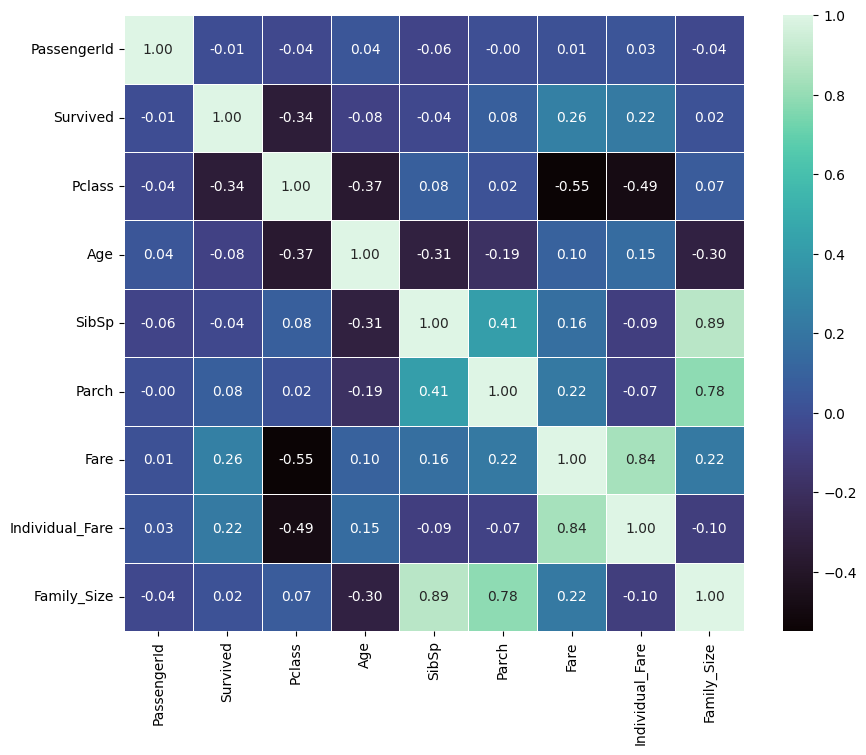

In [82]:
filt = list(df.select_dtypes(include=['int64', 'float64']).columns)
corr_matrix = df[filt].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="mako", linewidths=0.5, fmt="0.2f")

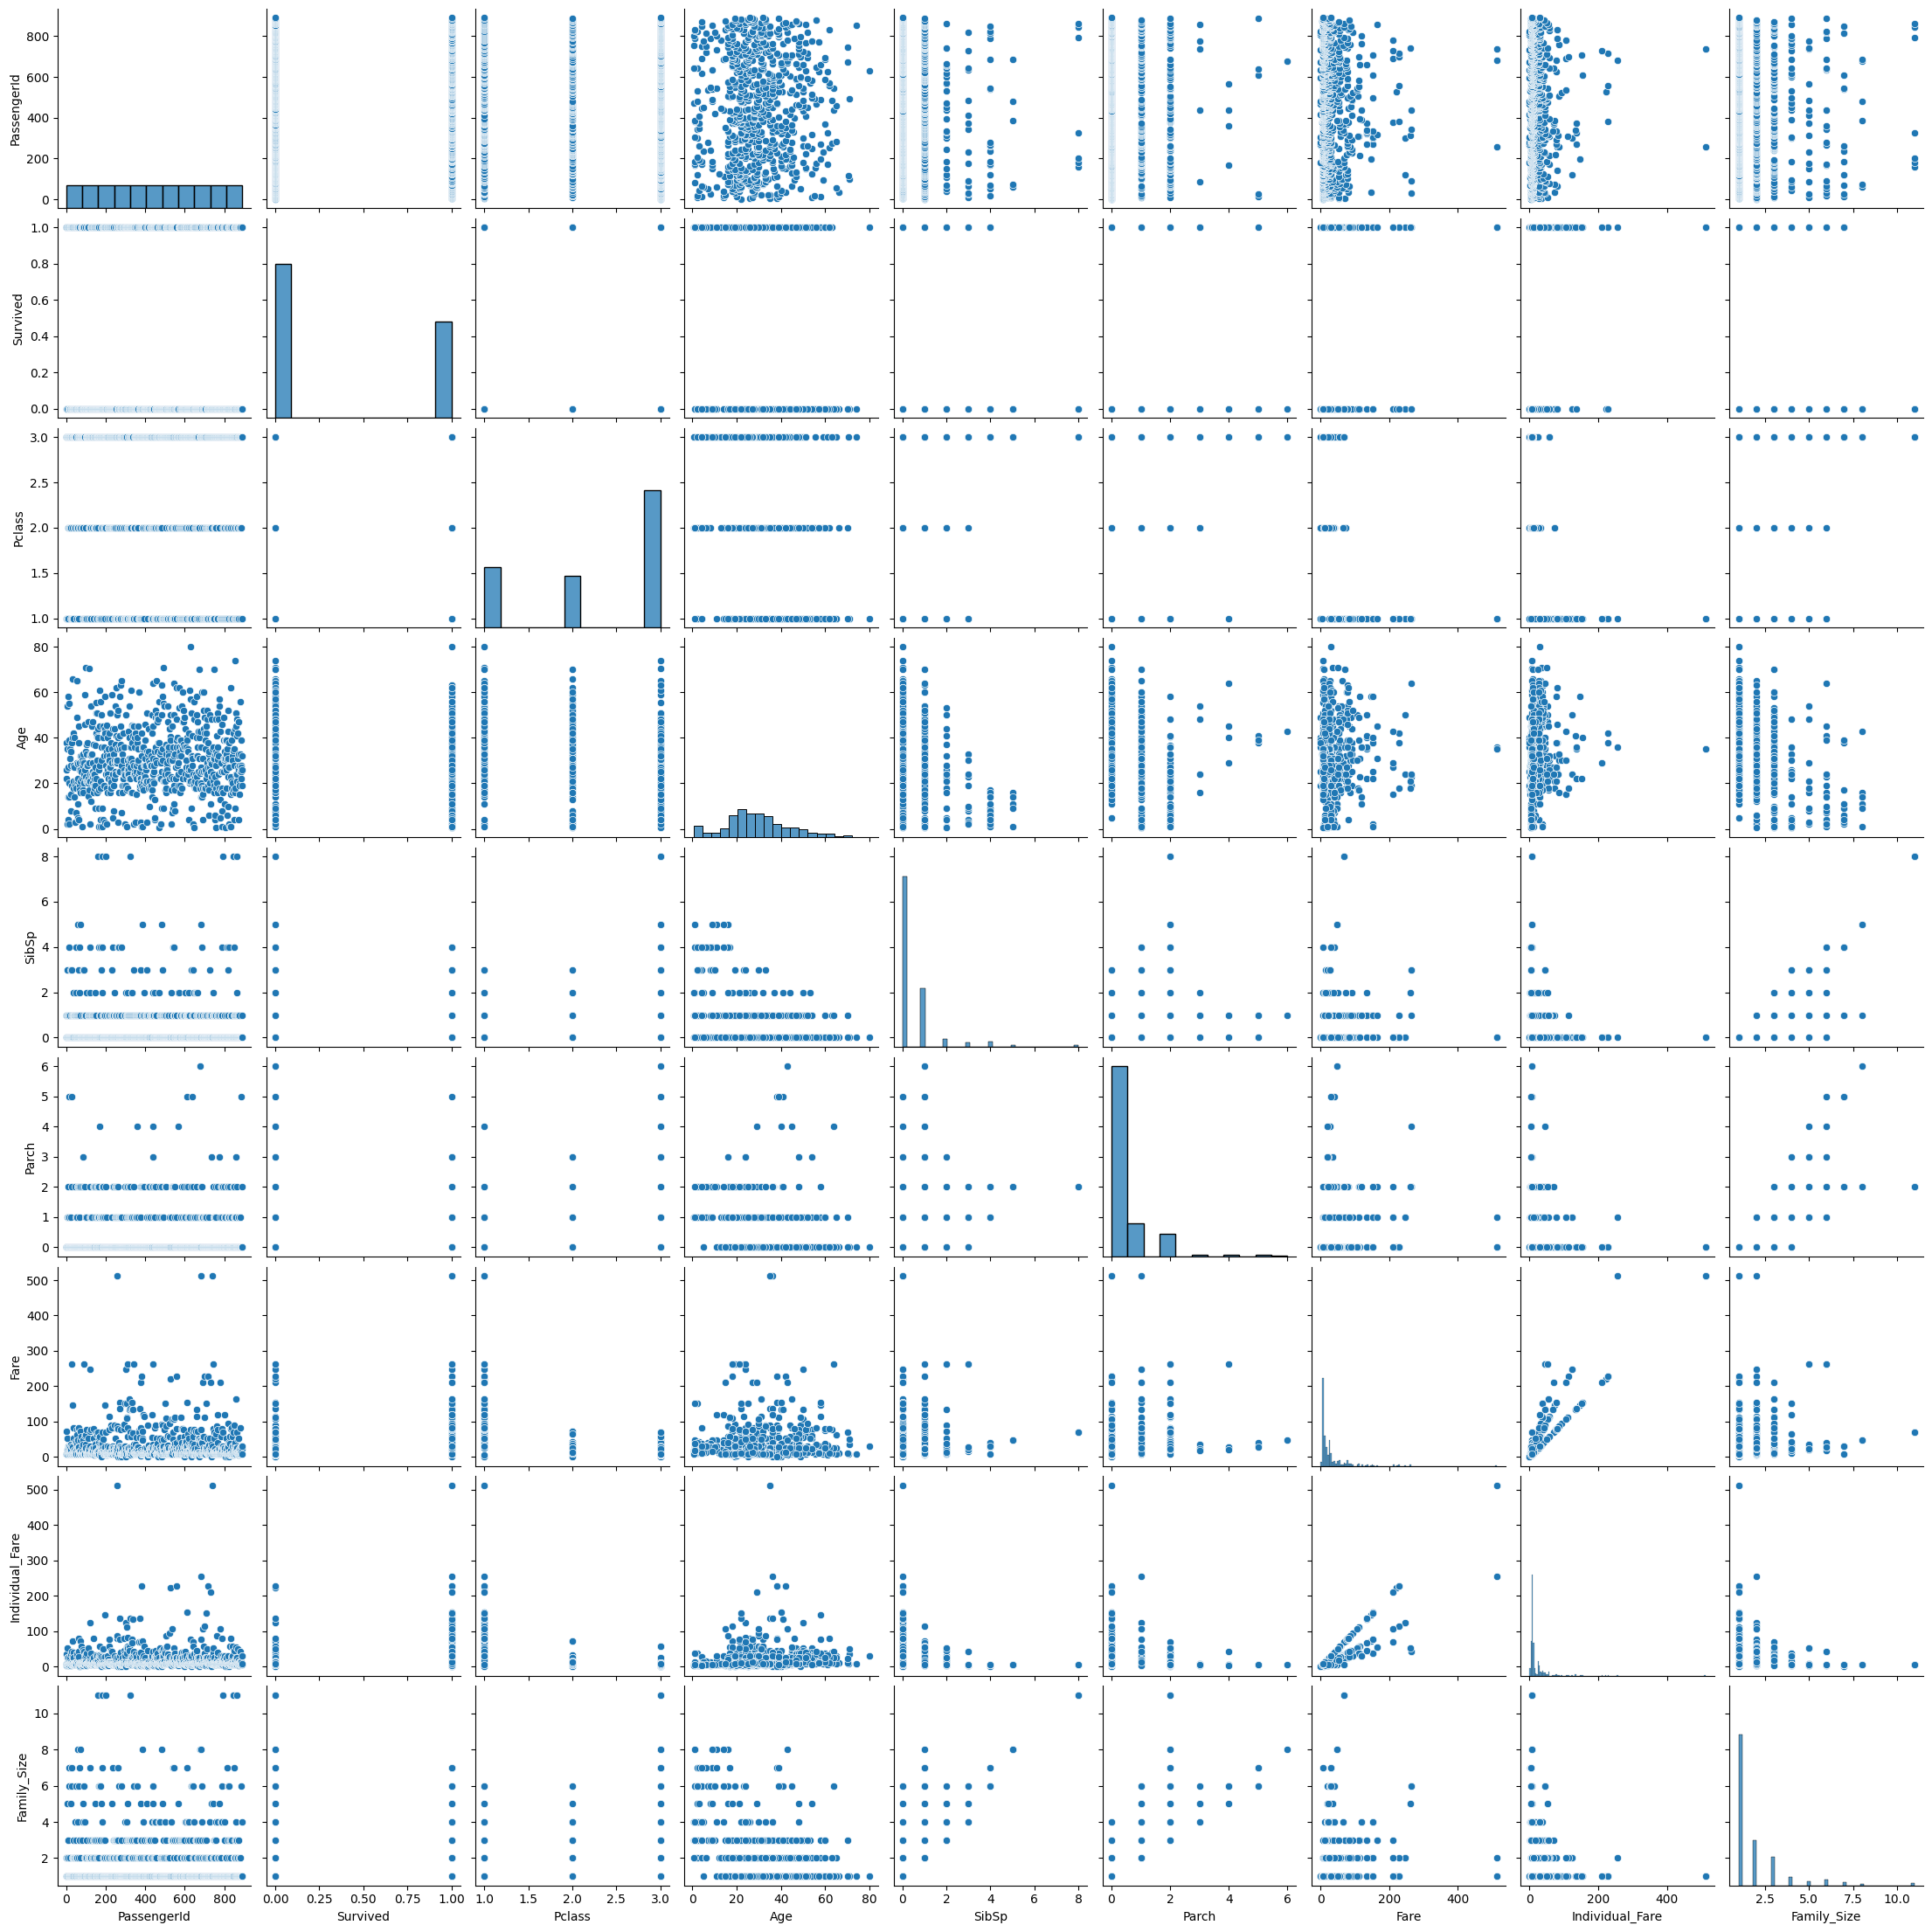

In [83]:
sns.pairplot(data=df[filt])